# Car Price Prediction  
Qué tal amigos! 👋🏽😄  
Bien dicen que la mejor forma de aprender algo nuevo es enseñar lo que sabes, y creo la mejor forma de enseñar es intentar demostrar los conceptos lo más simple posible, así que en este modelo es lo que intentaré hacer. Me parece un poco injusto para nosotros los latinos que casi no haya contenido de este estilo en español, así que quise intentarlo yo.  
**Por favor, si puedo recibir feedback sobre esto, o algún otro comentario, lo agradecería.**


---
Bien, para mantener simple la explicación, el proceso de trabajo lo voy a dividir en 3 etapas:
1. Análisis Exploratorio de datos y limpieza 
2. Ingenieria de Características (Feature Engineering)
3. Creación, Validación y Ajustes de Hiperparámetros del modelo

---
Antes de comenzar a Explorar los datos, necesitamos importar las librerías y ajustar algunas opciones:



In [2]:
import numpy as np
import pandas as pd

# Estas lineas indican la longitud maxima por default en filas y columnas
pd.set_option('display.max_columns', 45)
pd.set_option('display.max_rows', 45)
# Así como el número de decímales
pd.options.display.float_format="{:,.4f}".format

import matplotlib.pyplot as plt
import seaborn as sns
# Esto solo asigna el estilo de gráficos por default
plt.style.use('fivethirtyeight')

In [4]:
# el 'index_col=[0]' asigna la primera columna como indices, puesto que es el id
df = pd.read_csv('../data/raw/CarPrice_Assignment.csv', index_col=[0])

### Análisis Exploratorio de Datos
Creo que para hacer un buen análisis exploratorio, se hay que comenzar con una meta para saber la dirección por la que se quiere llevar el enfoque. Por ahora el objetivo es crear un modelo en base a la variable objetivo -> "**price**", para saber el precio que deberían tener ciertos nuevos coches en el mercado.  
Ya después lo haré conforme vayan surgiendo las preguntas. 

In [5]:
df.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,,,,,,,,,,,,,,,,,,,,,,,,,
1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6000,168.8000,64.1000,48.8000,2548,dohc,four,130,mpfi,3.4700,2.6800,9.0000,111,5000,21,27,"13,495.0000"
2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6000,168.8000,64.1000,48.8000,2548,dohc,four,130,mpfi,3.4700,2.6800,9.0000,111,5000,21,27,"16,500.0000"
3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5000,171.2000,65.5000,52.4000,2823,ohcv,six,152,mpfi,2.6800,3.4700,9.0000,154,5000,19,26,"16,500.0000"
4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8000,176.6000,66.2000,54.3000,2337,ohc,four,109,mpfi,3.1900,3.4000,10.0000,102,5500,24,30,"13,950.0000"
5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4000,176.6000,66.4000,54.3000,2824,ohc,five,136,mpfi,3.1900,3.4000,8.0000,115,5500,18,22,"17,450.0000"


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 205 entries, 1 to 205
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   CarName           205 non-null    object 
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 17  bo

Estos son las clases más comunes y más útiles creo yo para echar un primer vistazo a los datos. Con dos simples líneas de código me doy cuenta que es un dataset con:
- 205 datos
- 24 columnas
- 0 valores nulos
- dtypes de cada columna
- El contenido del df

Yo sé que es un df muy sencillo, y quizá en la vida real nunca te vas a encontrar información tan limpia, pero por motivos didácticos, quiero mantener esto lo más simple posible. La limpieza ya la haré un poco después de escoger las features de mi interés.

In [7]:
df['CarName'].value_counts()

CarName
toyota corona           6
toyota corolla          6
peugeot 504             6
subaru dl               4
mitsubishi mirage g4    3
                       ..
mazda glc 4             1
mazda rx2 coupe         1
maxda glc deluxe        1
maxda rx3               1
volvo 246               1
Name: count, Length: 147, dtype: int64

In [8]:
# Aquí solo agrupamos aquellos valores repetidos y mostramos lo que contiene uno de ellos
df.groupby('CarName').get_group('toyota corona')

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,,,,,,,,,,,,,,,,,,,,,,,,,
152,1,toyota corona,gas,std,two,hatchback,fwd,front,95.7000,158.7000,63.6000,54.5000,2040,ohc,four,92,2bbl,3.0500,3.0300,9.0000,62,4800,31,38,"6,338.0000"
159,0,toyota corona,diesel,std,four,sedan,fwd,front,95.7000,166.3000,64.4000,53.0000,2275,ohc,four,110,idi,3.2700,3.3500,22.5000,56,4500,34,36,"7,898.0000"
161,0,toyota corona,gas,std,four,sedan,fwd,front,95.7000,166.3000,64.4000,53.0000,2094,ohc,four,98,2bbl,3.1900,3.0300,9.0000,70,4800,38,47,"7,738.0000"
165,1,toyota corona,gas,std,two,hatchback,rwd,front,94.5000,168.7000,64.0000,52.6000,2204,ohc,four,98,2bbl,3.1900,3.0300,9.0000,70,4800,29,34,"8,238.0000"
176,-1,toyota corona,gas,std,four,hatchback,fwd,front,102.4000,175.6000,66.5000,53.9000,2414,ohc,four,122,mpfi,3.3100,3.5400,8.7000,92,4200,27,32,"9,988.0000"
180,3,toyota corona,gas,std,two,hatchback,rwd,front,102.9000,183.5000,67.7000,52.0000,3016,dohc,six,171,mpfi,3.2700,3.3500,9.3000,161,5200,19,24,"15,998.0000"


Podemos ver que el dataset contiene 205 modelos de distintas marcas de coches. La verdad es que no sé demasiado de coches. Me pregunto a que se deberá la variación en los datos. Quizá se deba a que son coches de distintos años, o quizá simplemente son distintos modelos, para estar seguro, haré lo siguiente:

In [9]:
df.drop_duplicates()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,,,,,,,,,,,,,,,,,,,,,,,,,
1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6000,168.8000,64.1000,48.8000,2548,dohc,four,130,mpfi,3.4700,2.6800,9.0000,111,5000,21,27,"13,495.0000"
2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6000,168.8000,64.1000,48.8000,2548,dohc,four,130,mpfi,3.4700,2.6800,9.0000,111,5000,21,27,"16,500.0000"
3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5000,171.2000,65.5000,52.4000,2823,ohcv,six,152,mpfi,2.6800,3.4700,9.0000,154,5000,19,26,"16,500.0000"
4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8000,176.6000,66.2000,54.3000,2337,ohc,four,109,mpfi,3.1900,3.4000,10.0000,102,5500,24,30,"13,950.0000"
5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4000,176.6000,66.4000,54.3000,2824,ohc,five,136,mpfi,3.1900,3.4000,8.0000,115,5500,18,22,"17,450.0000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1000,188.8000,68.9000,55.5000,2952,ohc,four,141,mpfi,3.7800,3.1500,9.5000,114,5400,23,28,"16,845.0000"
202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1000,188.8000,68.8000,55.5000,3049,ohc,four,141,mpfi,3.7800,3.1500,8.7000,160,5300,19,25,"19,045.0000"
203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1000,188.8000,68.9000,55.5000,3012,ohcv,six,173,mpfi,3.5800,2.8700,8.8000,134,5500,18,23,"21,485.0000"


Bien, puesto que son distintos todos, voy a asumir que cada uno contribuye a la creación del modelo

La verdad no sé que es symboling. Hice una rápida búsqueda en Google, pero no logré encontrar
una definición certera. Pudiera pasar tiempo buscando lo que es cada columna, pero prefiero hacer esto

<Axes: >

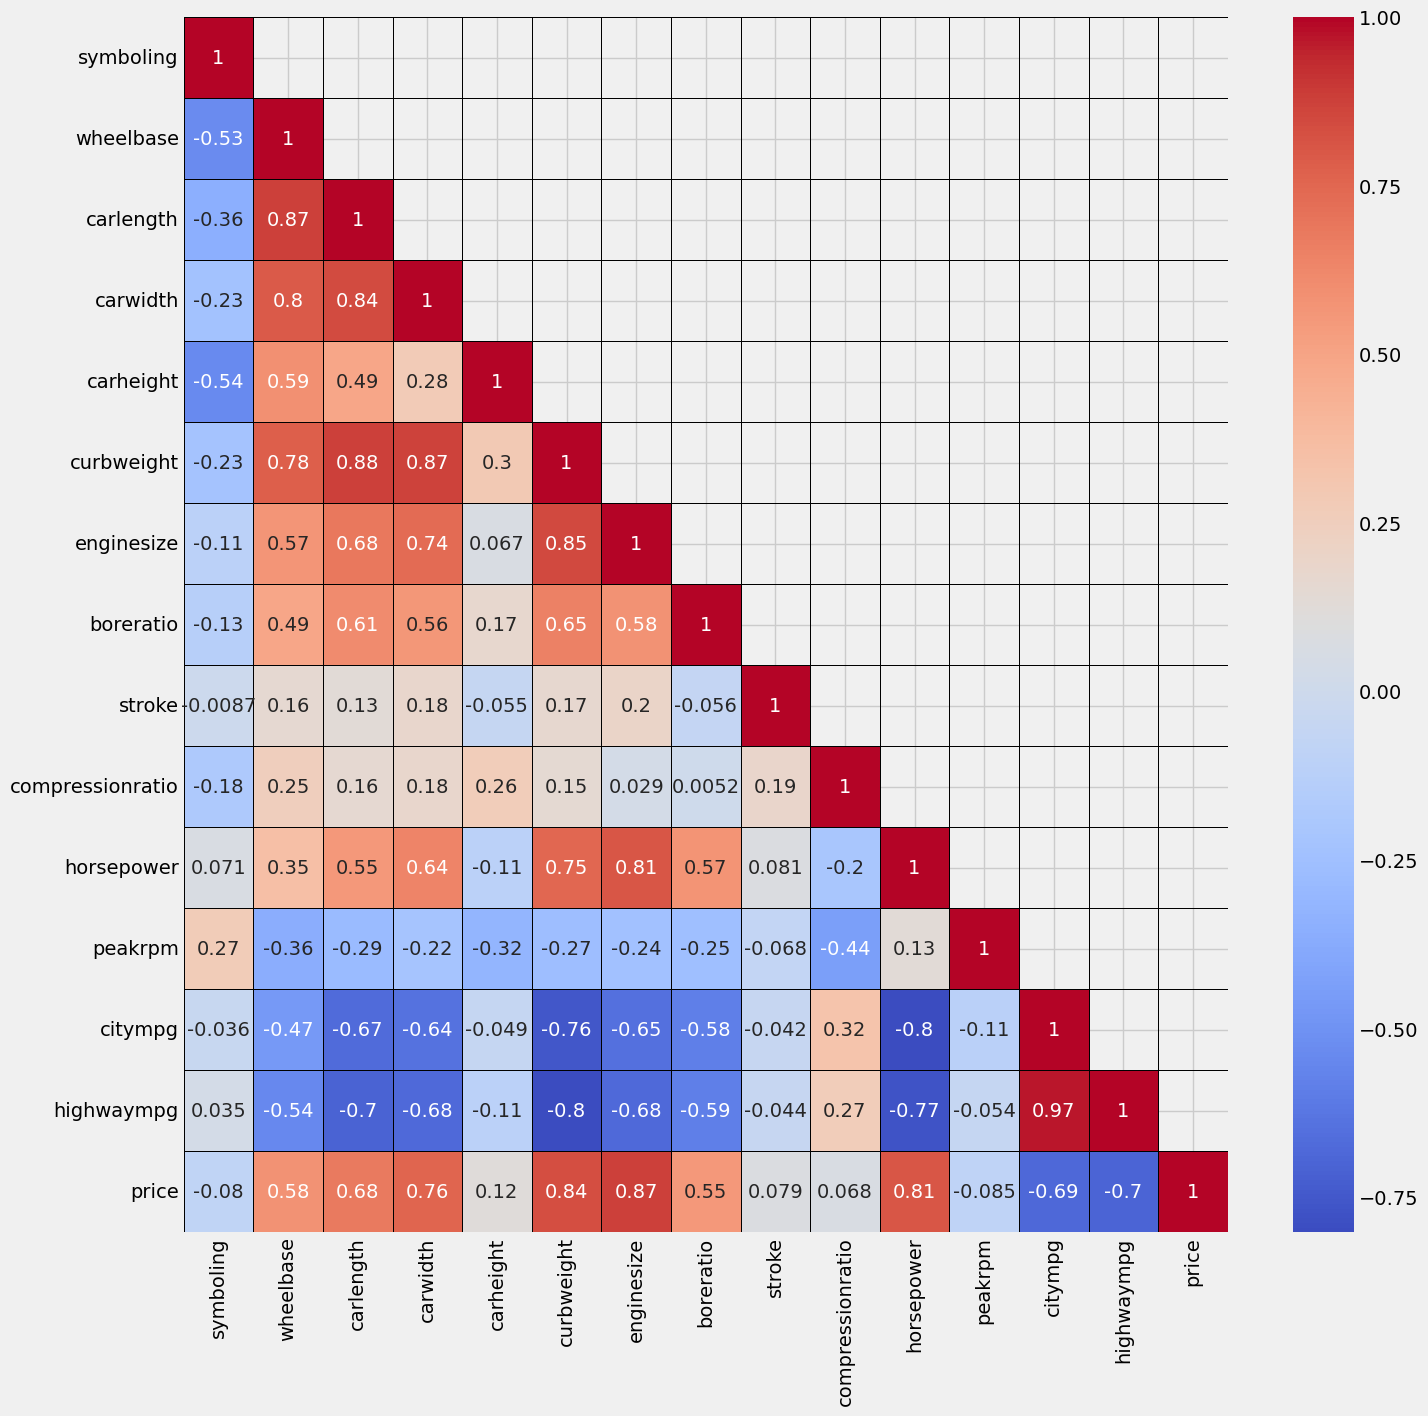

In [17]:
# # Creamos una variable que seleccione solo los números, y haga una tabla de correlación entre ellos
# corr=df.select_dtypes(include='number').corr()
# # y le escogemos un estilo con 2 decimales, paleta de colores "coolwarm"
# corr.style.background_gradient(cmap='coolwarm').format("{:.2f}")
plt.figure(figsize=(15, 15))
corr = df.select_dtypes(include='number').corr()
sns.heatmap(corr, cmap='coolwarm', annot=True, linewidths=0.5, linecolor='black', mask=np.triu(corr, k=1))

Así a simple vista, comparado con la variable objetivo **price**, hay algunas que no tienen una correlación relevante. Quizá esto no sea lo más correcto, pero no creo influya demasiado en el modelo final. De esta forma me deshago de algunas columnas poco útiles.

In [9]:
# Cada que hago modificaciones al df, prefiero crear uno nuevo para evitar posibles futuros errores
df2 = df.drop(['symboling','stroke','compressionratio','peakrpm'], axis='columns').copy()

Si se preguntan porque no tiré 'carheight', es porque esta me servirá un poco después.

In [10]:
df2.head()

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,horsepower,citympg,highwaympg,price
car_ID,,,,,,,,,,,,,,,,,,,,,
1,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6000,168.8000,64.1000,48.8000,2548,dohc,four,130,mpfi,3.4700,111,21,27,"13,495.0000"
2,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6000,168.8000,64.1000,48.8000,2548,dohc,four,130,mpfi,3.4700,111,21,27,"16,500.0000"
3,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5000,171.2000,65.5000,52.4000,2823,ohcv,six,152,mpfi,2.6800,154,19,26,"16,500.0000"
4,audi 100 ls,gas,std,four,sedan,fwd,front,99.8000,176.6000,66.2000,54.3000,2337,ohc,four,109,mpfi,3.1900,102,24,30,"13,950.0000"
5,audi 100ls,gas,std,four,sedan,4wd,front,99.4000,176.6000,66.4000,54.3000,2824,ohc,five,136,mpfi,3.1900,115,18,22,"17,450.0000"


Bien, ahora quiero lidiar con estas primeras columnas categóricas. Quiero saber como influyen en mi variable objetivo.

In [11]:
df2.select_dtypes(include='object').shape

(205, 10)

<Figure size 1500x500 with 0 Axes>

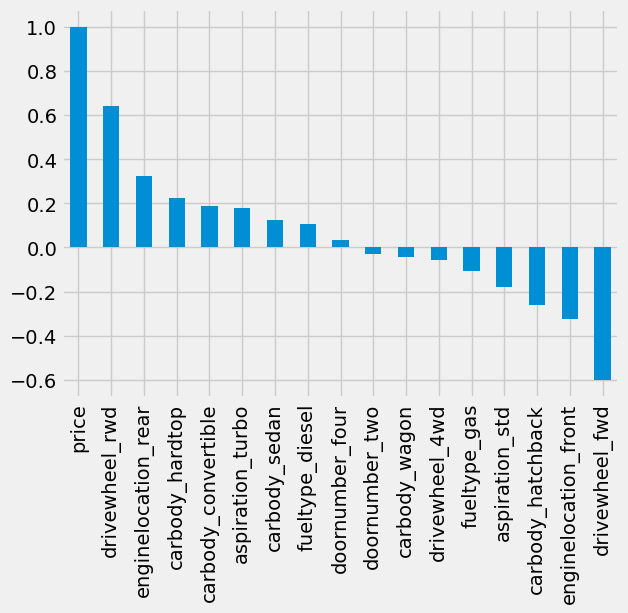

<Figure size 1500x500 with 0 Axes>

In [12]:

'''Puede parecer un poco abrumador el código de las siguientes dos graficas,
pero dejenme lo explico:
la primera línea concatena la variable objetivo, y puesto que el modelo no sabe interpretar 
variables categóricas, hacemos One Hot Encoding, ya que cada columna contiene pocas variables
únicas.
Asignamos este pequeño df a las variables "a" y "b", y creamos una gráfica de barras para 
analizar la correlación con respecto a la variable objetivo "price". Ordenamos los valores 
de mayor a menor, y le damos el tamaño a la gráfica.

Los separé entre a y b simplemente para una mejor visualización, pero en sí, ambas gráficas
pudieron haber estado juntas
'''
a = pd.concat([pd.get_dummies(
                        df2.select_dtypes(include='object')
                        .iloc[:,1:7]), df2['price']], axis=1)
a.corr()['price'].sort_values(ascending=False).plot(kind='bar')
plt.figure(figsize=(15,5))


<Figure size 1500x500 with 0 Axes>

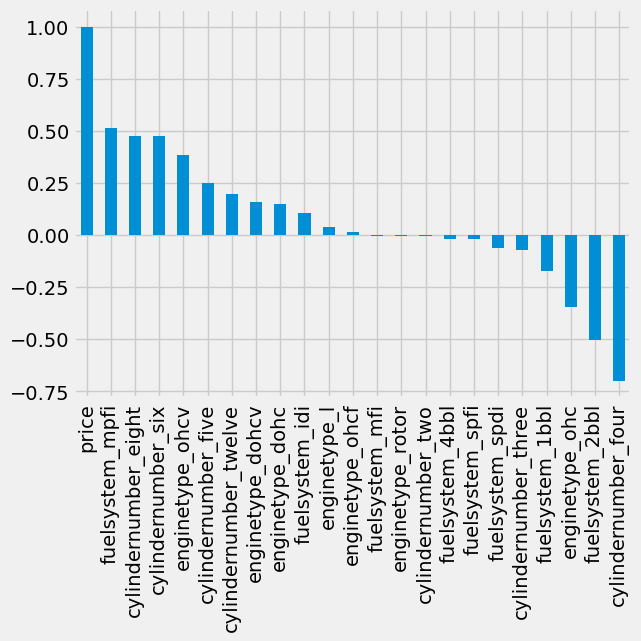

<Figure size 1500x500 with 0 Axes>

In [13]:
b = pd.concat([pd.get_dummies(
                        df2.select_dtypes(include='object')
                        .iloc[:,7:]), df2['price']], axis=1)
b.corr()['price'].sort_values(ascending=False).plot(kind='bar')
plt.figure(figsize=(15,5))

In [14]:
# Tiraré de una vez el número de puertas puesto que no tiene una correlación con el precio
df2 = df2.drop('doornumber', axis='columns')

De las gráfica anteriores, podemos ver que existen algunas columnas que influyen más. Estas me gustaría visualizarlas dentro de una gráfica de dispersión:

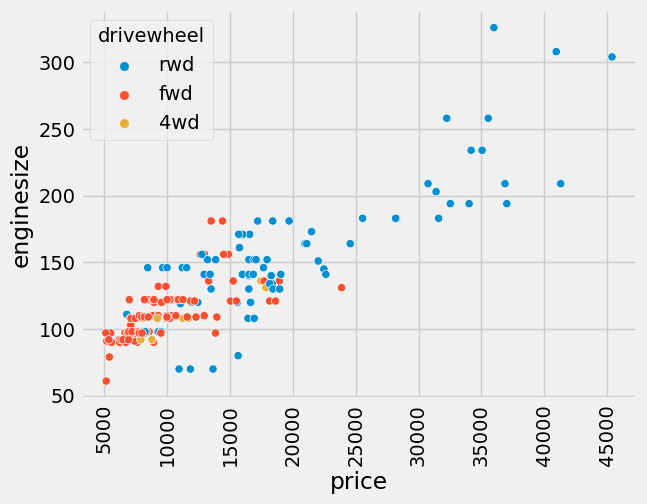

In [15]:
'''Bien, aquí utilicé enginesize en el eje y, puesto que era la que mejor correlación tuvo
en el heatmap. xticsk es solo para darle una rotación de 90 grados a los labels del eje x'''
sns.scatterplot(data=df2, x='price' ,y='enginesize', hue='drivewheel')
plt.xticks(rotation=90)
plt.show()

In [16]:
df2['drivewheel'].value_counts()

drivewheel
fwd    120
rwd     76
4wd      9
Name: count, dtype: int64

Nos podemos dar cuenta que, los coches con tracción en la llanta trasera ('rwd') son más caros, y a su vez tienen un enginesize más grande!  

Dada la baja correlación en coches con tracción en 4 llantas('4wd'), su poca cantidad de datos y su semejanza en cuanto al precio, lo sumaré a los coches de tracción delantera, para ahorrarme el hacer OHE aquí, y así reducir la dimensionalidad en las columnas.

In [17]:
df3 = df2.copy()
df3['drivewheel_rwd'] = df2['drivewheel'].apply(lambda x: 1 if x=='rwd' else 0)

In [18]:
df3 = df3.drop('drivewheel', axis='columns')

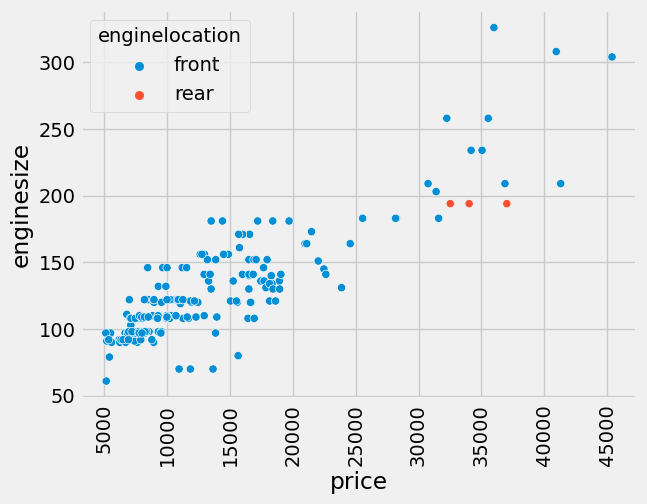

In [19]:
sns.scatterplot(data=df3, x='price' ,y='enginesize', hue='enginelocation')
plt.xticks(rotation=90)
plt.show()

Bien, tener solo 3 valores no influirá en el modelo, así que esta columna se va.

In [20]:
df3 = df3.drop('enginelocation', axis='columns')

Okey, volviendo a nuestra gráfica de correlación de barras, y a nuestro heatmap, me dan curiosidad ver dos cosas: Mientras menos millas por galón en carretera y la ciudad ("highwaympg" y "citympg" ), mayor es el precio. También nos damos cuenta que el número de cilindros en un coche influye demasiado!

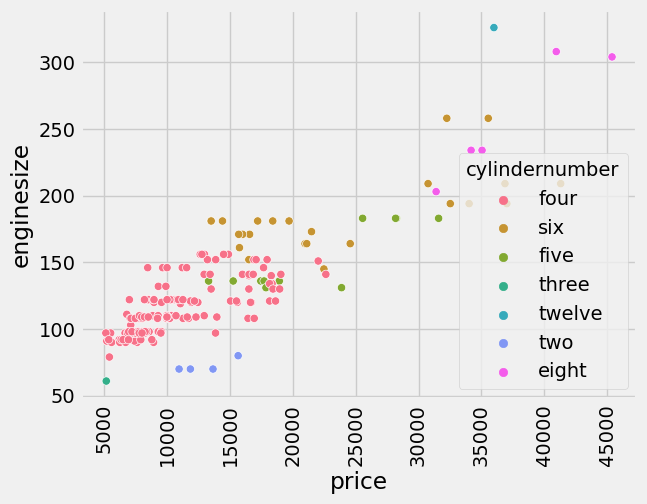

In [21]:
sns.scatterplot(data=df3, x='price' ,y='enginesize', hue='cylindernumber')
plt.xticks(rotation=90)
plt.show()

Bien! Nos damos cuenta de algo que aunque suena obvio, al menos yo no era consciente antes de verlo en los datos: A mayor número de cilindros en un coche, mayor su precio, y a su vez mayor el enginesize. Entonces, en vez de dar un OHE a esta variable, podemos crear un Label Encoder, que transforme la variable categórica a numérica.

---
Bien, investigando un poco, me doy cuenta que sklearn no recomienda usar LabelEncoder para columnas, en vez, usar OrdinalEncoder. Otra observación es, que la mejor práctica es el utilizar One Hot Encoding desde sklearn y no con el metodo de pandas "get_dummies", esto porque todo el preprocesamiento de datos es mejor hacerlo desde un pipeline para un mejor orden en la creación del modelo. Si soy sincero, **aún no tengo experiencia con el uso de Pipelines**, así que por este proyecto no lo usaré, pero seguiré aprendiendo...

In [22]:
from sklearn.preprocessing import OrdinalEncoder

categorias_ordinales = ['two', 'three', 'four', 'five', 'six', 'eight', 'twelve']

# Crea una instancia de OrdinalEncoder y especifica las categorías
oe = OrdinalEncoder(categories=[categorias_ordinales])

# Ajusta y transforma tus datos
categorias_codificadas = oe.fit_transform(df3[['cylindernumber']])

In [23]:
categorias_codificadas[:5]

array([[2.],
       [2.],
       [4.],
       [2.],
       [3.]])

In [24]:
df3['oe_cylindernumber'] = categorias_codificadas

In [25]:
df3.head()

,CarName,fueltype,aspiration,carbody,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,horsepower,citympg,highwaympg,price,drivewheel_rwd,oe_cylindernumber
car_ID,,,,,,,,,,,,,,,,,,,,
1,alfa-romero giulia,gas,std,convertible,88.6000,168.8000,64.1000,48.8000,2548,dohc,four,130,mpfi,3.4700,111,21,27,"13,495.0000",1,2.0000
2,alfa-romero stelvio,gas,std,convertible,88.6000,168.8000,64.1000,48.8000,2548,dohc,four,130,mpfi,3.4700,111,21,27,"16,500.0000",1,2.0000
3,alfa-romero Quadrifoglio,gas,std,hatchback,94.5000,171.2000,65.5000,52.4000,2823,ohcv,six,152,mpfi,2.6800,154,19,26,"16,500.0000",1,4.0000
4,audi 100 ls,gas,std,sedan,99.8000,176.6000,66.2000,54.3000,2337,ohc,four,109,mpfi,3.1900,102,24,30,"13,950.0000",0,2.0000
5,audi 100ls,gas,std,sedan,99.4000,176.6000,66.4000,54.3000,2824,ohc,five,136,mpfi,3.1900,115,18,22,"17,450.0000",0,3.0000


Bien, ahora solo hay que recordar que los números no son equivalentes a el numero de cilindros, puesto que oe ordena los valores de 0 - (no_valores_unicos-1)

---
Este proyecto lo estoy haciendo a través de una jupyter notebook desde el buscador web, porque creí que así se vería más profesional, pero si es demasiada diferencia trabajar en tu propio entorno local como lo es en VSCode. No hay IDE que se asemeje, y el Workflow es mucho más rápido. De todas formas, terminaré de una vez con este proyecto ya aquí.


In [26]:
df4 = df3.copy()
df4 = df4.drop('cylindernumber', axis='columns')

In [27]:
df4['fueltype'].value_counts()

fueltype
gas       185
diesel     20
Name: count, dtype: int64

In [28]:
df4['fuelsystem'].value_counts()

fuelsystem
mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: count, dtype: int64

In [29]:
'''Tenemos algunas variables con un solo valor! Si hago One Hot Encoding con esto, me va a crear muchas columnas 
inútiles, así que, aquellos fuel system's que no estén dentro de 'mpfi' y '2bbl', los cambiaré a 'other'
'''
df4['fuelsystem'] = df4['fuelsystem'].apply(lambda x: 'other' if x not in ['mpfi', '2bbl'] else x)


In [30]:
df4['aspiration'].value_counts()

aspiration
std      168
turbo     37
Name: count, dtype: int64

In [31]:
df['carbody'].value_counts()

carbody
sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: count, dtype: int64

Esta tambien contiene variables con muy pocos valores, pero no puedo reducirlas porque se encuentran muy dispersas en nuestra gráfica de correlación con respecto a la variable 'price' 🔝, y puesto que tenemos un dataset no muy grande, no creo que sea gran trabajo computacional el hacer OHE con estas 5 nuevas columnas

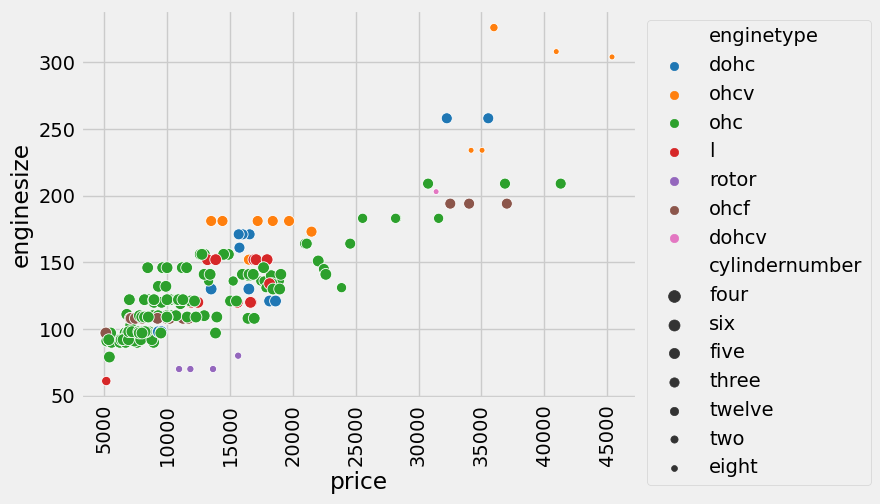

In [32]:
""" 
    AQUI UTILIZAMOS LA VARIABLE OBJETIVO PRECIO, EL ENGINESIZE EN EL EJE Y, LOS SEPARAMOS POR COLOR MEDIANTE SU ENGINETYPE, 
    LOS DIVIDIMOS POR TAMAÑOS EN BASE AL NÚMERO DE CILINDROS, Y LE DIMOS UNA PALETA DE COLORES. LA LEYENDA LA MENCIONAMOS 
    FUERA DEL GRÁFICO, Y LA MOSTRAMOS CON MATPLOTLIB
"""
sns.scatterplot(data=df3, x='price' ,y='enginesize', hue='enginetype',size='cylindernumber',palette='tab10')
plt.xticks(rotation=90)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

In [33]:
df4['enginetype'].value_counts()

enginetype
ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: count, dtype: int64

Bien, podemos ver que el enginetype tiene una alta correlación, pero no quiero que una columna como 'dohcv' influya en mi modelo. Podemos ver que los coches con dos cilindros manejan un tipo ingenieril (creo sería la traducción) de tipo rotor, y que los más comunes son los ohc, que creo son los que manejan la mayoría de coches con 4 cilindros.  
no quiero cambiar 'rotor' por lo mismo, a pesar de tener muy pocos valores, pero 'dohcv' lo asignaré al grupo del 'ohcv' por su similitud con estos. 


In [34]:
# Antes de moverlo, quiero saber cuales son exactamente:
df4.query("enginetype=='dohcv' | enginetype=='rotor'")

,CarName,fueltype,aspiration,carbody,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,enginesize,fuelsystem,boreratio,horsepower,citympg,highwaympg,price,drivewheel_rwd,oe_cylindernumber
car_ID,,,,,,,,,,,,,,,,,,,
56,mazda 626,gas,std,hatchback,95.3000,169.0000,65.7000,49.6000,2380,rotor,70,other,3.3300,101,17,23,"10,945.0000",1,0.0000
57,mazda glc,gas,std,hatchback,95.3000,169.0000,65.7000,49.6000,2380,rotor,70,other,3.3300,101,17,23,"11,845.0000",1,0.0000
58,mazda rx-7 gs,gas,std,hatchback,95.3000,169.0000,65.7000,49.6000,2385,rotor,70,other,3.3300,101,17,23,"13,645.0000",1,0.0000
59,mazda glc 4,gas,std,hatchback,95.3000,169.0000,65.7000,49.6000,2500,rotor,80,mpfi,3.3300,135,16,23,"15,645.0000",1,0.0000
130,porsche cayenne,gas,std,hatchback,98.4000,175.7000,72.3000,50.5000,3366,dohcv,203,mpfi,3.9400,288,17,28,"31,400.5000",1,5.0000


In [35]:
df4['enginetype'] = df4['enginetype'].apply(lambda x: 'ohcv' if x=='dohcv' else x)

In [36]:
df4.head()

,CarName,fueltype,aspiration,carbody,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,enginesize,fuelsystem,boreratio,horsepower,citympg,highwaympg,price,drivewheel_rwd,oe_cylindernumber
car_ID,,,,,,,,,,,,,,,,,,,
1,alfa-romero giulia,gas,std,convertible,88.6000,168.8000,64.1000,48.8000,2548,dohc,130,mpfi,3.4700,111,21,27,"13,495.0000",1,2.0000
2,alfa-romero stelvio,gas,std,convertible,88.6000,168.8000,64.1000,48.8000,2548,dohc,130,mpfi,3.4700,111,21,27,"16,500.0000",1,2.0000
3,alfa-romero Quadrifoglio,gas,std,hatchback,94.5000,171.2000,65.5000,52.4000,2823,ohcv,152,mpfi,2.6800,154,19,26,"16,500.0000",1,4.0000
4,audi 100 ls,gas,std,sedan,99.8000,176.6000,66.2000,54.3000,2337,ohc,109,mpfi,3.1900,102,24,30,"13,950.0000",0,2.0000
5,audi 100ls,gas,std,sedan,99.4000,176.6000,66.4000,54.3000,2824,ohc,136,mpfi,3.1900,115,18,22,"17,450.0000",0,3.0000


---
### **2. Feature Engineering**

Bien! Recuerdan porque no eliminé la variable de 'carheight' al inicio?? 
Vamos a crear 2 nuevas columnas útiles creo yo, para nuestro modelo.
Utilizaremos el volumen de un coche y su densidad para complementarlo.


In [37]:
df4['carvolume'] = df4['carlength'] * df4['carwidth'] * df4['carheight']
df4['cardensity'] = df4['carvolume'] / df4['curbweight']

In [38]:
df4.head()

,CarName,fueltype,aspiration,carbody,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,enginesize,fuelsystem,boreratio,horsepower,citympg,highwaympg,price,drivewheel_rwd,oe_cylindernumber,carvolume,cardensity
car_ID,,,,,,,,,,,,,,,,,,,,,
1,alfa-romero giulia,gas,std,convertible,88.6000,168.8000,64.1000,48.8000,2548,dohc,130,mpfi,3.4700,111,21,27,"13,495.0000",1,2.0000,"528,019.9040",207.2292
2,alfa-romero stelvio,gas,std,convertible,88.6000,168.8000,64.1000,48.8000,2548,dohc,130,mpfi,3.4700,111,21,27,"16,500.0000",1,2.0000,"528,019.9040",207.2292
3,alfa-romero Quadrifoglio,gas,std,hatchback,94.5000,171.2000,65.5000,52.4000,2823,ohcv,152,mpfi,2.6800,154,19,26,"16,500.0000",1,4.0000,"587,592.6400",208.1448
4,audi 100 ls,gas,std,sedan,99.8000,176.6000,66.2000,54.3000,2337,ohc,109,mpfi,3.1900,102,24,30,"13,950.0000",0,2.0000,"634,816.9560",271.6376
5,audi 100ls,gas,std,sedan,99.4000,176.6000,66.4000,54.3000,2824,ohc,136,mpfi,3.1900,115,18,22,"17,450.0000",0,3.0000,"636,734.8320",225.4727


<Axes: xlabel='price', ylabel='cardensity'>

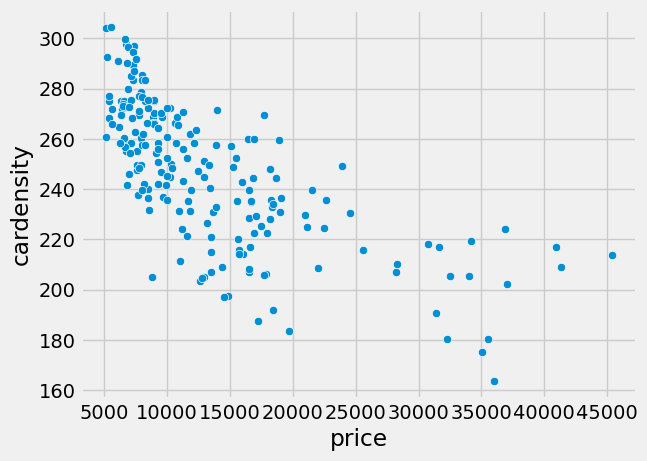

In [39]:
sns.scatterplot(data=df4, x='price', y='cardensity')

Podemos ver una relación! a menor densidad en el coche, mayor su precio, aunque llega un punto en la densidad, arriba de 220 peso/volumen aprox (no especifican unidades), donde la curva se estabiliza. Sin embargo, hay una correlacion lineal bajo este numero, y esto es lo que influirá en nuestro modelo :)

In [40]:
'''get_dumies es el metodo de pandas para hacer OHE. Creo no es la mejor practica, pero por ahora es suficiente.
df4.iloc[:, 1:] hace list slicing, donde incluyo todas las filas, y todas las variables categóricas excepto la primera
'''
ohe = pd.get_dummies(df4.iloc[:, 1:].select_dtypes(include='object'))
ohe

,fueltype_diesel,fueltype_gas,aspiration_std,aspiration_turbo,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,enginetype_dohc,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fuelsystem_2bbl,fuelsystem_mpfi,fuelsystem_other
car_ID,,,,,,,,,,,,,,,,,,
1,False,True,True,False,True,False,False,False,False,True,False,False,False,False,False,False,True,False
2,False,True,True,False,True,False,False,False,False,True,False,False,False,False,False,False,True,False
3,False,True,True,False,False,False,True,False,False,False,False,False,False,True,False,False,True,False
4,False,True,True,False,False,False,False,True,False,False,False,True,False,False,False,False,True,False
5,False,True,True,False,False,False,False,True,False,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,False,True,True,False,False,False,False,True,False,False,False,True,False,False,False,False,True,False
202,False,True,False,True,False,False,False,True,False,False,False,True,False,False,False,False,True,False
203,False,True,True,False,False,False,False,True,False,False,False,False,False,True,False,False,True,False


Me gusta!! Esto ya solo lo concateno a mis datos para comenzar a hacer el modelo:

In [41]:
df5 = pd.concat([df4.select_dtypes(include='number'), ohe], axis='columns')

In [42]:
df5.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,price,drivewheel_rwd,oe_cylindernumber,carvolume,cardensity,fueltype_diesel,fueltype_gas,aspiration_std,aspiration_turbo,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,enginetype_dohc,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fuelsystem_2bbl,fuelsystem_mpfi,fuelsystem_other
car_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,88.6000,168.8000,64.1000,48.8000,2548,130,3.4700,111,21,27,"13,495.0000",1,2.0000,"528,019.9040",207.2292,False,True,True,False,True,False,False,False,False,True,False,False,False,False,False,False,True,False
2,88.6000,168.8000,64.1000,48.8000,2548,130,3.4700,111,21,27,"16,500.0000",1,2.0000,"528,019.9040",207.2292,False,True,True,False,True,False,False,False,False,True,False,False,False,False,False,False,True,False
3,94.5000,171.2000,65.5000,52.4000,2823,152,2.6800,154,19,26,"16,500.0000",1,4.0000,"587,592.6400",208.1448,False,True,True,False,False,False,True,False,False,False,False,False,False,True,False,False,True,False
4,99.8000,176.6000,66.2000,54.3000,2337,109,3.1900,102,24,30,"13,950.0000",0,2.0000,"634,816.9560",271.6376,False,True,True,False,False,False,False,True,False,False,False,True,False,False,False,False,True,False
5,99.4000,176.6000,66.4000,54.3000,2824,136,3.1900,115,18,22,"17,450.0000",0,3.0000,"636,734.8320",225.4727,False,True,True,False,False,False,False,True,False,False,False,True,False,False,False,False,True,False


In [43]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Index: 205 entries, 1 to 205
Data columns (total 33 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   wheelbase            205 non-null    float64
 1   carlength            205 non-null    float64
 2   carwidth             205 non-null    float64
 3   carheight            205 non-null    float64
 4   curbweight           205 non-null    int64  
 5   enginesize           205 non-null    int64  
 6   boreratio            205 non-null    float64
 7   horsepower           205 non-null    int64  
 8   citympg              205 non-null    int64  
 9   highwaympg           205 non-null    int64  
 10  price                205 non-null    float64
 11  drivewheel_rwd       205 non-null    int64  
 12  oe_cylindernumber    205 non-null    float64
 13  carvolume            205 non-null    float64
 14  cardensity           205 non-null    float64
 15  fueltype_diesel      205 non-null    bool   


In [44]:
X = df5.drop('price', axis='columns')
y = df5['price']

### 3. Creación, validación y ajustes de hiperparámetros del modelo

Aquí tengo que ser sincero. No soy experto en esto aún, pero me he dado cuenta que lo más importante para este modelo ya lo hemos hecho. Cuando la gente se refiere a "construir un modelo", realmente se refiere a limpiar datos, crear columnas y seleccionar las columnas para tu modelo, porque el background matemático y las formulas necesarias ya se encuentran cargadas en sklearn y algunas librerías como XGBoost, donde tú solo tienes que ajustarlos con el método `fit`

In [45]:
# Aquí separamos los datos en datos de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [46]:
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor

# Modelo de Regresión con Random Forest
rf_model = RandomForestRegressor(n_estimators=1000, max_depth=10, min_samples_split=2, min_samples_leaf=1, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf_regression = rf_model.predict(X_test)
print(f"Random Forest Score = {r2_score(y_test,y_pred_rf_regression)*100}")


Random Forest Score = 95.8511607473852


In [47]:
rf_model.score(X_test,y_test) * 100


95.8511607473852

Wow!! casi 96% n.n
Listo, para Random Forest esto fue todo! Estuve experimentando con los hiperparámetros para ver cual me daba mejor resultado, y creo que a 1000 arboles de decisión, profundidad de las ramas de 10,  el modelo predice mejor

In [48]:
# Hice una prueba para ver la diferencia entre el valor real y el predicho de una fila aleatoria
pred_0 = rf_model.predict([X_test.iloc[0]])
print(f"el valor real del coche es: {y_test.iloc[0]}, y su valor predicho fue: {pred_0}")

el valor real del coche es: 30760.0, y su valor predicho fue: [34941.036]


/Users/daniboy/miniconda3/envs/ML/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [49]:
print("RMSE", np.sqrt(mean_squared_error(y_test,y_pred_rf_regression)))

RMSE 1809.7680862054306


In [50]:
df['price'].mean()

13276.710570731706

Personalmente, no me gusta utilizar modelos de regresión lineal y logística, puesto que rara vez nos serán los más útiles en análisis multivariables. Son esenciales creo yo para entender como funciona overfitting y underfitting, pero una vez entiendes la relación entre sesgo y varianza creo puedes pasar de ellos. En cambio, prefiero los modelos que se basan en decision trees, y aún más, aquellos que se basan en el error de los decision trees, como lo es XGBoost. Tiene demasiados hiperparámetros, pero es considerado uno de los mejores algoritmos de aprendizaje supervisado, es decir, cuando tenemos una variable objetivo, en este caso "price". Y si, estos pueden llevar a mayor coste computacional quizá, pero sabiendo controlar sus hiperparametros, y conociendo las capacidades de tu computadora, puedes lograr muy buenos resultados en muy poco tiempo. Al final, estas exprimiendo toda la matemática a que la haga tu computadora

In [51]:
import xgboost as xgb

# Modelo de Regresión con XGBoost
xgboost_regressor = xgb.XGBRegressor(
    n_estimators=100, max_depth=3, learning_rate=0.1, subsample=1.0, 
    colsample_bytree=0.5, gamma=0.0, random_state=42)
xgboost_regressor.fit(X_train, y_train)
y_pred_xgboost_regression = xgboost_regressor.predict(X_test)
mse_xgboost_regression = mean_squared_error(y_test, y_pred_xgboost_regression)
print("MAE (XGBoost Regresión):", mse_xgboost_regression)

MAE (XGBoost Regresión): 5358400.102837478


In [52]:
print("RMSE (XGBoost Regresión):", np.sqrt(mse_xgboost_regression))

RMSE (XGBoost Regresión): 2314.821829609674


In [53]:
y_pred_xgboost_regression = xgboost_regressor.predict(X_test)
print(f"XGBoost Score = {r2_score(y_test,y_pred_xgboost_regression)*100}")

XGBoost Score = 93.2124053941896


Bien, podemos ver un mejor score con Random Forest, pero la verdad aún no entiendo bien como modificar los hiperparamteros en XGBoost. Así que aún no diré que fue mejor.  
  
Okey, aquí ya estuve investigando como mejorar los hiperparámetros. Basicamente el algoritmo crea 1,000 arboles de decisión, y el `early_stopping_rounds=10` nos dice que cuando el 'rmse' (Root Mean Squared Error) permanezca aumentando después de 10 iteraciones más, termine el algoritmo con la menor. `n_jobs=2` es el número de cores del procesador con los que quieres que el algoritmo utilice la computación paralela, esto acelera el proceso, pero se recomienda usarlo con respecto a los cores del procesador de tu computadora, que en mi caso son dos. El learning rate son los baby steps para llegar al mínimo global, `max_depth=3` es la profundidad de los decisión trees generados, y el `random_state=42` es la semilla aleatoria para el algoritmo. Por convención se utiliza el 42, y fue el mismo que utilicé para los 3 algoritmos    
Ya dentro del metodo `fit`, lo ajustamos con los datos de entrenamiento, y lo evaluamos con los de prueba. `verbose` nos imprime en pantalla cada 'n' veces el "rmse", o sea, los pasos que el algoritmo está dando en busca de ese mínimo global, que son un poco conceptos ya de Machine Learning. Para explicarlo mejor, "RMSE" refiere de ROOT MEAN SQUARED ERROR, que quizá es poco espacio para explicarlo aquí, pero en pocas palabras, la raíz es, porque el modelo necesita elevar al cuadrado para darle mayor peso a los valores mayores y menores del error entre el valor predicho y el real.


In [54]:
reg = xgb.XGBRegressor(n_estimators=1000, early_stopping_rounds=5, n_jobs=2,
                            learning_rate=0.03, max_depth=3, random_state=42)
reg.fit(X_train, y_train,
       eval_set=[(X_train, y_train), (X_test,y_test)],
       verbose=100)

[0]	validation_0-rmse:14884.79548	validation_1-rmse:15680.81953
[100]	validation_0-rmse:1700.90589	validation_1-rmse:2412.22755
[145]	validation_0-rmse:1240.53599	validation_1-rmse:2279.49714


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=5,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.03, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=2, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [55]:
# Obtener el último valor del RMSE en el conjunto de validación
final_rmse = reg.evals_result_['validation_1']['rmse'][-1]

print(f"RMSE en el conjunto de validación: {final_rmse}")


RMSE en el conjunto de validación: 2281.520712489974


In [56]:
from sklearn.metrics import r2_score

y_pred = reg.predict(X_test)
r2 = r2_score(y_test, y_pred)

print(f"R2 en el conjunto de prueba: {r2}")


R2 en el conjunto de prueba: 0.9342391658172655


In [57]:
fi = pd.DataFrame(data=reg.feature_importances_,
            index=reg.feature_names_in_,
            columns=['importance'])

Text(0.5, 1.0, 'Feature importance')

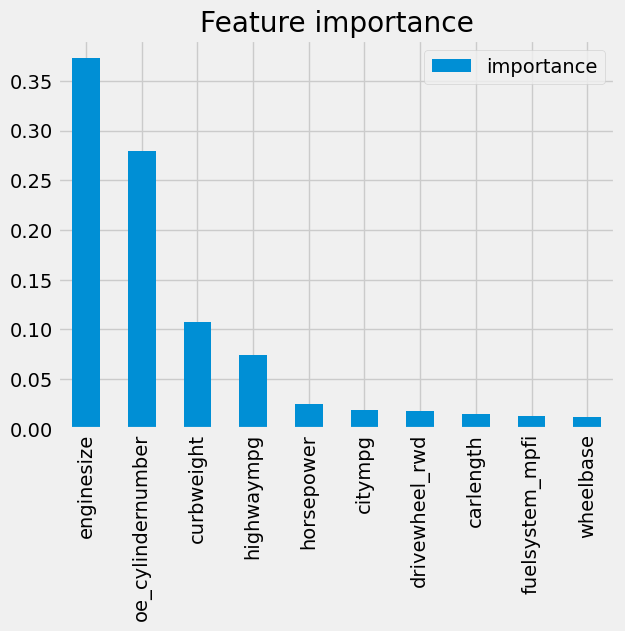

In [58]:
# Esto nos muestra el peso que tomó el algoritmo para crear los árboles de decisión, esto ya es mas de XGBoost y Gradient Boosting
fi.sort_values('importance', ascending=False).head(10).plot(kind='bar')
plt.title('Feature importance')

---
Bien, había encontrado un modelo con casi 96% de accuracy, cierto?? Pues, ahora crearé una estructura más estandarizada para encontrar el mejor modelo. Es la primera vez que pongo en practica librerias como "LGBMRegressor", "GridSearchCV", e intentaré explicarlas para una mejor comprensión.

In [59]:

from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

In [60]:
"""
    AQUI HAY QUE TENER CUIDADO, PORQUE POR CADA PARAMETRO EXTRA QUE AGREGUEMOS VA A MULTIPLICAR EL NUMERO DE ITERACIONES,
    HACIENDO QUE SEA MUCHA CARGA PARA EL PROCESADOR, ASI QUE EN ESTE CASO UTILIZARÉ POCAS, PERO DISPERSAS ENTRE SI. PARA
    EL MINIMO DE SEPARACIONES, Y EL MINIMO DE HOJAS, LOS DEJE EN SOLO UN VALOR, PARA MULTIPLICAR POR 1. Y PUESTO QUE RANDOM
    FOREST TUVO EL MAYOR SCORE, EMPEZARÉ POR ESTE
"""
param_grid_rf = {
    'n_estimators': [100, 500],
    'max_depth': [10, 30, 50],
    'min_samples_split': [1,2],
    'min_samples_leaf': [1,2],
}


# 1 Random Forest Regressor() X 2 valores para el numero de arboles del modelo X 3 profundidades distintas, 1 un Numero de hojas y ramas fijo.
# Esto multiplicado 5 veces los K-folds que utilizo el Cross Validation para encontrar un algoritmo más rígido. De nuevo, terminos de ML.
#                        1 X 2 X 3 X 1 X 1 X 5 = 30 RandomForestRegressor() distintos para encontrar el menor 'rmse'!!
grid_search_rf = GridSearchCV(
    estimator=RandomForestRegressor(),
    param_grid=param_grid_rf,
    scoring='neg_mean_squared_error',
    cv=5,
    verbose=5
)


In [61]:
# Nuevamente ajustamos el modelo, pero con cada uno de los modelos
grid_search_rf.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 1/5] END max_depth=10, min_samples_leaf=1, min_samples_split=1, n_estimators=100;, score=nan total time=   0.0s
[CV 2/5] END max_depth=10, min_samples_leaf=1, min_samples_split=1, n_estimators=100;, score=nan total time=   0.0s
[CV 3/5] END max_depth=10, min_samples_leaf=1, min_samples_split=1, n_estimators=100;, score=nan total time=   0.0s
[CV 4/5] END max_depth=10, min_samples_leaf=1, min_samples_split=1, n_estimators=100;, score=nan total time=   0.0s
[CV 5/5] END max_depth=10, min_samples_leaf=1, min_samples_split=1, n_estimators=100;, score=nan total time=   0.0s
[CV 1/5] END max_depth=10, min_samples_leaf=1, min_samples_split=1, n_estimators=500;, score=nan total time=   0.0s
[CV 2/5] END max_depth=10, min_samples_leaf=1, min_samples_split=1, n_estimators=500;, score=nan total time=   0.0s
[CV 3/5] END max_depth=10, min_samples_leaf=1, min_samples_split=1, n_estimators=500;, score=nan total time=   0.0s
[CV 4/5] E

/Users/daniboy/miniconda3/envs/ML/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
60 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/daniboy/miniconda3/envs/ML/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/daniboy/miniconda3/envs/ML/lib/python3.11/site-packages/sklearn/ensemble/_forest.py", line 340, in fit
    self._validate_params()
  File "/Users/daniboy/miniconda3/envs/ML/lib/python3.11/site-packages/sklearn/base.py", line 600, in _validate_params
    

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [10, 30, 50], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [1, 2],
                         'n_estimators': [100, 500]},
             scoring='neg_mean_squared_error', verbose=5)

In [62]:
# Encontramos el mejor modelo con el metodo '.best_estimator_'
best_model_rf = grid_search_rf.best_estimator_

In [63]:
best_model_rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, n_estimators=500)

In [64]:
# Y calculamos el porcentage de error para el mejor Random Forest es:
print(f"El porcentage de error para el mejor Random Forest es: {best_model_rf.score(X_test, y_test) * 100}")

El porcentage de error para el mejor Random Forest es: 95.84086066172479


Mejoramos un poco nuestro modelo!! 🥰

In [65]:
"""
    HACEMOS LO MISMO PARA LOS OTROS DOS MODELOS:
    ... Si se preguntan porque estan comentados, es porque el metodo 'gridsearchcv' itera por cada uno de los parametros
    y los multiplica! Haciendo que se creen demasiados modelos (como en nuestro ejemplo con RandomForest), y esto puede
    tardar dependiendo de la maquina y el procesador. Aún así, si quieres ver como funciona, solo descomenta las siguientes
    lineas
"""


# param_grid_xgb = {
#     'n_estimators': [100, 500],
#     'max_depth': [10, 50],
#     'learning_rate': [0.01, 0.1],
#     'min_child_weight': [1, 5],
# }

# grid_search_xgb = GridSearchCV(
#     estimator=XGBRegressor(),
#     param_grid=param_grid_xgb,
#     scoring='neg_mean_squared_error',
#     cv=5,
#     verbose=5
# )

# grid_search_xgb.fit(X_train, y_train)



"\n    HACEMOS LO MISMO PARA LOS OTROS DOS MODELOS:\n    ... Si se preguntan porque estan comentados, es porque el metodo 'gridsearchcv' itera por cada uno de los parametros\n    y los multiplica! Haciendo que se creen demasiados modelos (como en nuestro ejemplo con RandomForest), y esto puede\n    tardar dependiendo de la maquina y el procesador. Aún así, si quieres ver como funciona, solo descomenta las siguientes\n    lineas\n"

In [66]:
# best_model_xgb = grid_search_xgb.best_estimator_
# best_model_xgb.fit(X_train, y_train)

In [67]:
# # Y calculamos el porcentage de error para el mejor Random Forest es:
# print(f"El porcentage de error para el mejor XGBRegressor es: {best_model_xgb.score(X_test, y_test) * 100}")

In [68]:
# param_grid_lgbm = {
#     'n_estimators': [100, 500],
#     'max_depth': [10],
#     'num_leaves': [2, 4],
#     'learning_rate': [0.01, 0.1],
#     'min_child_weight': [1, 5],
# }

# grid_search_lgbm = GridSearchCV(
#     estimator=LGBMRegressor(),
#     param_grid=param_grid_lgbm,
#     scoring='neg_mean_squared_error',
#     cv=5,
#     verbose=5
# )

# grid_search_lgbm.fit(X_train, y_train)

**NOTA:** Para la creacion de los dos modelos extra, me ahorre el paso y simplemente se lo pedí a ChatGPT

In [69]:
# best_model_lgbm = grid_search_lgbm.best_estimator_
# best_model_lgbm.fit(X_train, y_train)

In [70]:
# # Y calculamos el porcentage de error para el mejor Random Forest es:
# print(f"El porcentage de error para el mejor XGBRegressor es: {best_model_lgbm.score(X_test, y_test) * 100}")

---  
Indiscutiblemente podemos ver que para este caso Random Forest fue el más adecuado. XGBoost mejora notablemente su rendimiento con datasets mas grandes, me di cuenta cuando aumenté train split de datos de 70% a 80%. LightGB fue el de menor rendimiento, para su defensa, aún no sé bien como ajustar sus hiperparámetros.  


In [71]:
print(f"Aunque aumentó solo un poco: {(  95.87059566993466-95.8511607473852 ):.2f}%, ahora tenemos un algoritmo más sólido y rígido puesto que fue expuesto a un cross-validation con 5 k-folds")


Aunque aumentó solo un poco: 0.02%, ahora tenemos un algoritmo más sólido y rígido puesto que fue expuesto a un cross-validation con 5 k-folds


In [72]:
y_pred = best_model_rf.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

In [73]:
rmse


1812.0131974193896

Esto quiere decir, que el error promedio de nuestros datos varia por 1805!

---
Ahora, demos unas conclusiones en base a nuestro modelo

In [74]:
print(f"El porcentage de error para el mejor Random Forest con datos de prueba es: \
{best_model_rf.score(X_train, y_train) * 100}")

El porcentage de error para el mejor Random Forest con datos de prueba es: 98.53509518778463


In [75]:
print(f"El porcentage de error para el mejor Random Forest es: {best_model_rf.score(X_test, y_test) * 100}")

El porcentage de error para el mejor Random Forest es: 95.84086066172479


Wow! Tenemos casi 98.5% de score en nuestro modelo de entrenamiento. Esto no significa el valor real de nuestro modelo puesto que puede estar **overfitted**, pero la relación con el score en el test set, me da muy buena impresión

Tener un algoritmo con 98.44% de predicción es realmente bueno, puesto que es el conjunto de prueba, nos demuestra que tenemos muy buena 'bias'->sesgo. Si quiero mejorar el gap entre este y el score ya con X_test, que es cerca del 3%, conseguir más datos ayudaría al modelo, aunque podría intentar incrementar la regularización (lambda)

> ChatGPT -> como incremento la regularización en un algoritmo de random forest

En los algoritmos Random Forest, la regularización se controla principalmente mediante los hiperparámetros relacionados con la complejidad del árbol, como max_depth, min_samples_split, min_samples_leaf, max_features, entre otros. Aumentar la regularización generalmente se refiere a limitar la profundidad del árbol y aumentar el número mínimo de muestras requeridas para dividir un nodo o formar una hoja.

Aquí hay algunos hiperparámetros que puedes ajustar para aumentar la regularización en un algoritmo de Random Forest:

- `max_depth`: Este hiperparámetro controla la profundidad máxima de los árboles en el bosque. Reducir max_depth limitará la profundidad de los árboles y aumentará la regularización.

- `min_samples_split`: Este hiperparámetro establece el número mínimo de muestras requeridas para dividir un nodo interno del árbol. Aumentar este valor hará que los árboles sean menos profundos y aumentará la regularización.

- `min_samples_leaf`: Este hiperparámetro establece el número mínimo de muestras requeridas para formar una hoja del árbol. Aumentar este valor generará hojas más pequeñas y aumentará la regularización.

- `max_features`: Este hiperparámetro controla la cantidad máxima de características a considerar al dividir un nodo. Reducir este valor puede aumentar la regularización al limitar la selección de características en cada división.

In [76]:
best_model_rf

RandomForestRegressor(max_depth=10, n_estimators=500)

Puesto que nuestro modelo fue de max_depth=30 y n_estimators=500, vamos a experimentar nuevamente con sus hiperparametros pero tomando en cuenta la regularización que nos proporcionó ChatGPT.

In [77]:

# param_grid_rf_reg = {
#     'n_estimators': [100],
#     'max_depth': [30,35],
#     'min_samples_split': [1,2],
#     'min_samples_leaf': [2,3,4],
#     'max_features': [5,10]
# }


# # 1 Random Forest Regressor() X 1 valor para el numero de arboles del modelo X 2 profundidades distintas, 
# # 2 ramas, 3 hojas y 2 maximo numero de caracteristicas. Esto multiplicado 5 veces los K-folds que utilizo el 
# # Cross Validation para encontrar un algoritmo más rígido. De nuevo, terminos de ML.
# # 1 X 1 X 2 X 2 X 3 X 2 X 5 = 120 RandomForestRegressor() distintos para encontrar el menor 'rmse'!!
# grid_search_rf_reg = GridSearchCV(
#     estimator=RandomForestRegressor(),
#     param_grid=param_grid_rf_reg,
#     scoring='neg_mean_squared_error',
#     cv=5,
#     verbose=5
# )


In [78]:
# grid_search_rf_reg.fit(X_train,y_train)

In [79]:
# best_model_rf_reg = grid_search_rf_reg.best_estimator_

In [80]:
# best_model_rf_reg

In [81]:
# best_model_rf_reg.score(X_train,y_train)

In [82]:
# best_model_rf_reg.score(X_test,y_test)

### Qué pasó aquí??
Bien, como ya expliqué, creé varios modelos para encontrar el que tuviera el mayor score, y puesto que quise que el modelo encontrara un mayor porcentage con respecto al visto en el score con el "Training-set", tuve de dos: Encontrar mas datos, o aumentar su regularización. Trágicamente no pude, como les dije aún no tengo gran experiencia con esto, y es por eso que utilizaremos el mejor modelo que ya habíamos creado pasos atrás.

In [83]:
best_model_rf.score(X_test,y_test)

0.9584086066172479

In [84]:
y_pred = best_model_rf.predict(X_test)
y_pred

array([34654.165     , 18165.58361984,  9139.32568077, 13010.93816786,
       28499.46338242,  6309.77579127,  7820.63078977,  7986.15285131,
        9963.68960863,  8114.90702627, 14793.06619292,  7920.65273305,
       14980.45356528, 10969.55625271, 40071.893     ,  6301.98923088,
        5660.48634286, 13864.65283311,  8552.76638205,  9646.13605047,
       10403.96816825, 15340.28446818,  7050.05703822,  5720.69273333,
        7395.89291578, 34597.706     ,  9450.74765264, 16512.37842907,
        7175.40836369, 16270.03675209, 28574.88988242,  6374.00916342,
        8060.772808  , 18916.63064172,  8042.56179683, 28368.50825742,
       10989.29306416, 12262.60104242,  7582.55660446, 14581.87246089,
        8529.31266258])

In [85]:
y_test

car_ID
16    30,760.0000
10    17,859.1670
101    9,549.0000
133   11,850.0000
69    28,248.0000
96     7,799.0000
160    7,788.0000
163    9,258.0000
148   10,198.0000
183    7,775.0000
192   13,295.0000
165    8,238.0000
66    18,280.0000
176    9,988.0000
74    40,960.0000
153    6,488.0000
19     5,151.0000
83    12,629.0000
87     8,189.0000
144    9,960.0000
61     8,495.0000
102   13,499.0000
99     8,249.0000
31     6,479.0000
26     6,692.0000
17    41,315.0000
169    9,639.0000
196   13,415.0000
98     7,999.0000
195   12,940.0000
68    25,552.0000
121    6,229.0000
155    7,898.0000
203   21,485.0000
80     7,689.0000
70    28,176.0000
146   11,259.0000
56    10,945.0000
46     8,916.5000
85    14,489.0000
147    7,463.0000
Name: price, dtype: float64

In [86]:
Resultados_Modelo = pd.DataFrame({'Precio_Predicho':y_pred, 'Precio_Real': y_test}).sort_index()

In [87]:
Resultados_Modelo

,Precio_Predicho,Precio_Real
car_ID,,
10,"18,165.5836","17,859.1670"
16,"34,654.1650","30,760.0000"
17,"34,597.7060","41,315.0000"
19,"5,660.4863","5,151.0000"
26,"7,395.8929","6,692.0000"
31,"5,720.6927","6,479.0000"
46,"7,582.5566","8,916.5000"
56,"12,262.6010","10,945.0000"
61,"10,403.9682","8,495.0000"


In [88]:
df.shape

(205, 25)

Bien! Como pueden ver, solo tengo 41 rows, te un dataset que tenía 205. Esto es porque cuando hice split con el train / test, solo incluí el 20%. Ahora, no quise hacer el valor predicho del modelo en mis datos de prueba porque sería un valor injusto a los nuevos datos, como sí lo es nuestro 'y_pred'. Ahora quiero que vean la correlación entre ambos n.n

In [89]:
Resultados_Modelo.corr()

,Precio_Predicho,Precio_Real
Precio_Predicho,1.0000,0.9791
Precio_Real,0.9791,1.0000


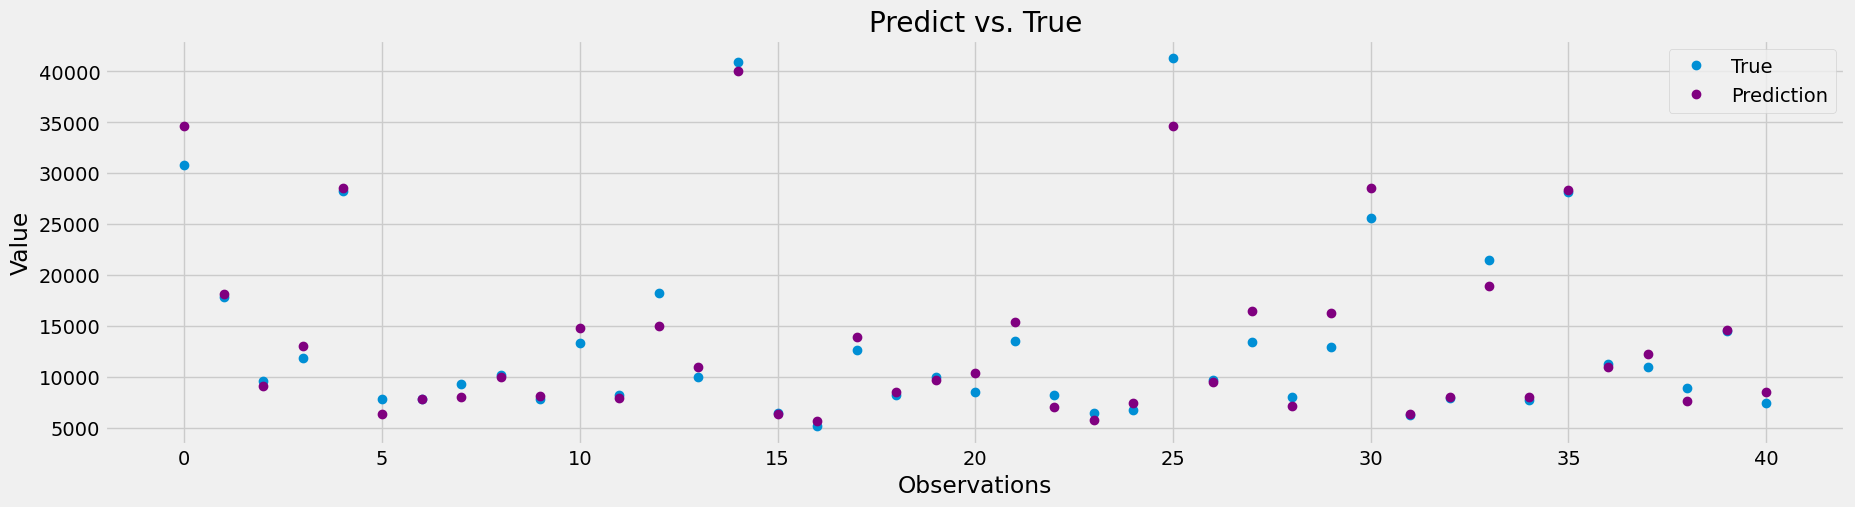

In [93]:
plt.figure(figsize=(20, 5))

t = pd.DataFrame({"y_pred": y_pred, "y_test": y_test})

plt.plot(t["y_test"].to_list(), label="True", marker="o", linestyle="none")
plt.plot(
    t["y_pred"].to_list(),
    label="Prediction",
    marker="o",
    linestyle="none",
    color="purple",
)
plt.ylabel("Value")
plt.xlabel("Observations")
plt.title("Predict vs. True")
plt.legend()
plt.show()

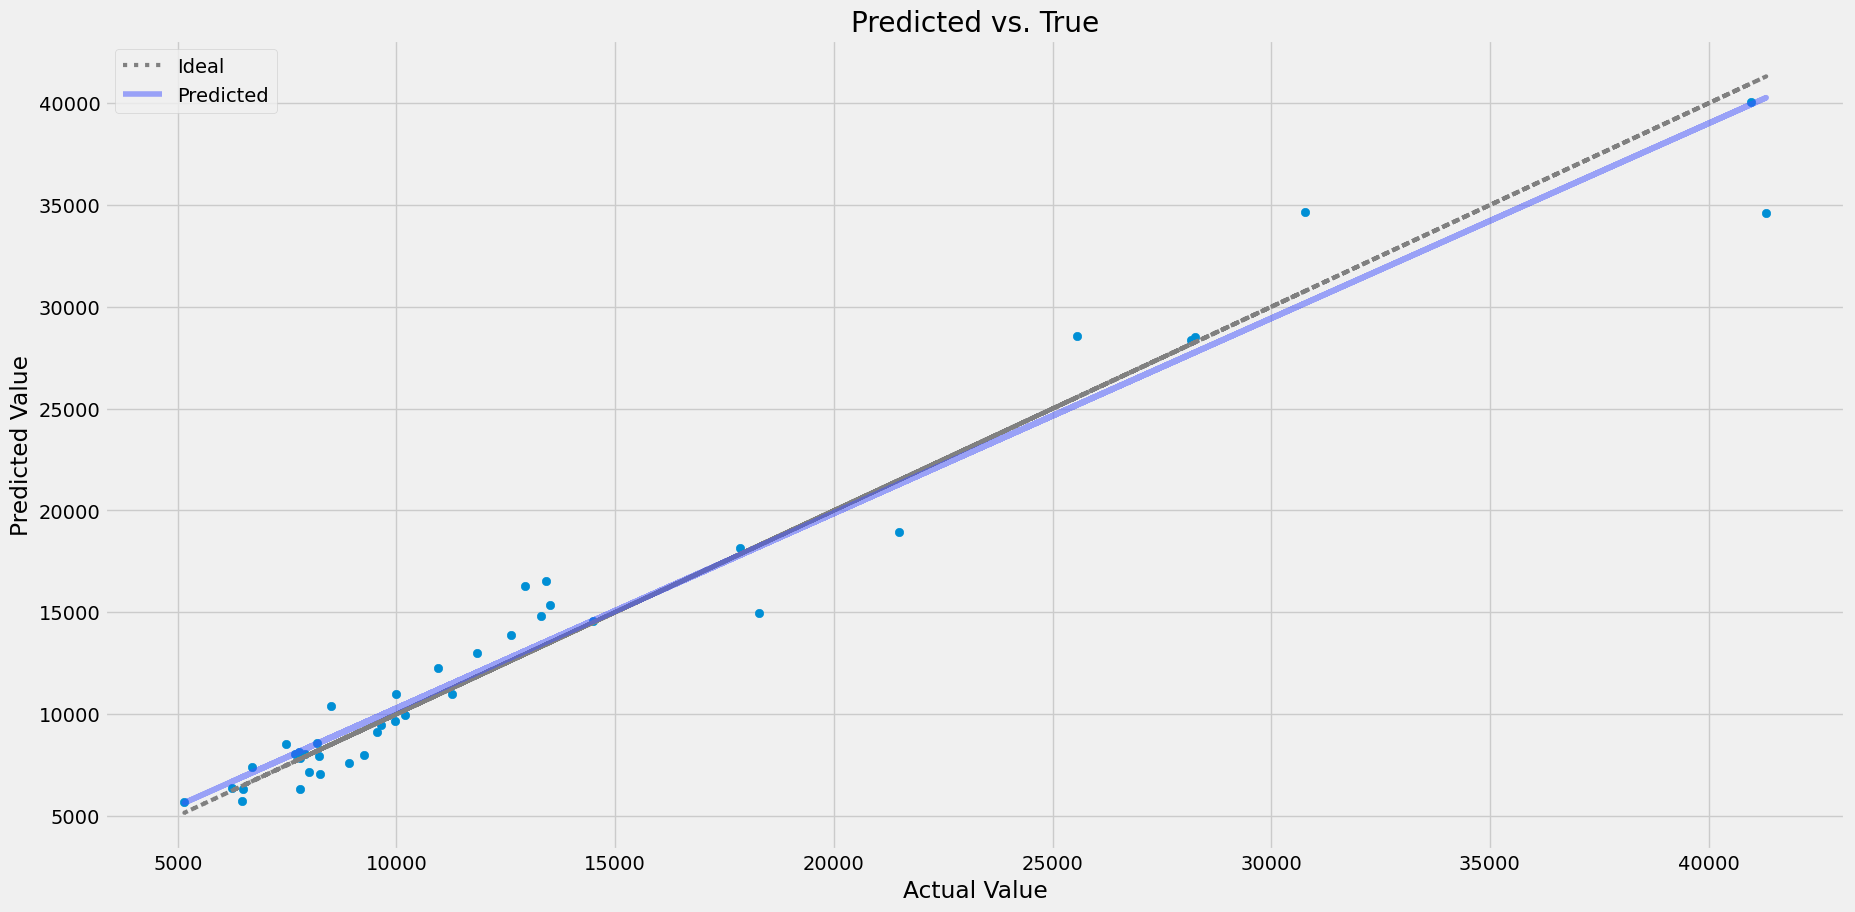

In [94]:
# Create canvas
plt.figure(figsize=(20, 10))

# Plot scatter
plt.scatter(y_test, y_pred)

# Plot diagonal line (perfect fit)
z = np.polyfit(y_test, y_test, 1)
p = np.poly1d(z)
plt.plot(
    y_test, p(y_test), color="gray", linestyle="dotted", linewidth=3, label="Ideal"
)

# Overlay the regression line
z = np.polyfit(y_test, y_pred, 1)
p = np.poly1d(z)
plt.plot(y_test, p(y_test), color="#4353ff", label="Predicted", alpha=0.5)

plt.xlabel("Actual Value")
plt.ylabel("Predicted Value")
plt.title("Predicted vs. True")
plt.legend()
plt.show()


**NOTA:** No terminé de exportar el modelo, pero es porque seguiré practicando próximamente, pero en scripts de python. Para el próximo proyecto ya estaré más fuerte.

---
# Y eso fue todo!! 😄
Gracias por haber llegado hasta acá. Si lo hiciste, qué opinas?? Crees que pude haber hecho algo mejor? Dejalo en los comentarios, quizá así aprendamos todos. 
Quizá para alguien que apenas está entrando esto le parezca abrumador, pero solo es constancia a través del tiempo. Seguiré desarrollando este superpoder 🤯 Quizá el próximo proyecto lo haga en algo aplicable en la vida real 🥶...